In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import math
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE

%matplotlib inline

In [2]:
#Loading dataframes from dataset

dataframe = pd.read_csv("Mobile_Dataset/train.csv")
dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#dropping the non-important features of the mobile in determining the price range using Recursive feature extraction technique
dataframe = dataframe.drop(['blue','clock_speed','dual_sim','fc','four_g','m_dep','n_cores','pc','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'],axis=1)

In [4]:
X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, 6].values

In [5]:
dataframe.head()

,battery_power,int_memory,mobile_wt,px_height,px_width,ram,price_range
0,842,7,188,20,756,2549,1
1,1021,53,136,905,1988,2631,2
2,563,41,145,1263,1716,2603,2
3,615,10,131,1216,1786,2769,2
4,1821,44,141,1208,1212,1411,1


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Parameter evaluation with GSC validation
gbe = GradientBoostingClassifier(random_state=42)
parameters={'learning_rate': [0.05, 0.1, 0.5],
            'max_features': [0.5, 1],
            'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe, parameters, cv=10, scoring='accuracy')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.5, 'max_depth': 3, 'max_features': 0.5}
0.9285


In [9]:
gbi = GradientBoostingClassifier(learning_rate=0.5, max_depth=3,
                                 max_features=0.5,
                                 random_state=42)
X_train,X_test,y_train, y_test = train_test_split(X, y, random_state=42)
gbi.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbi.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbi.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.902


In [10]:
#to know only the important 6 features out of the 20 long feature list using Recursive Feature Extraction
#we used this method to determine the important features after once we trained the whole set first and then dropped the non-import features.

#rfe = RFE(gbi, 6)
#fit = rfe.fit(X, y)
#print("Num Features: %d" % fit.n_features_)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)

In [11]:
# Predicting the Test set results
y_pred = gbi.predict_proba(X_test)[:,1]

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

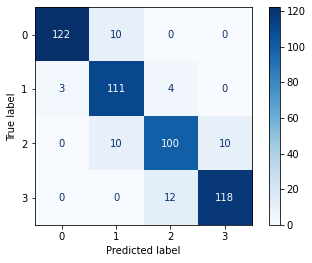

In [13]:
disp = plot_confusion_matrix(gbi, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [14]:
import pickle

In [15]:
pickle.dump(gbi, open("price_range.pickle", "wb"))

In [16]:
from tkinter import*
from PIL import ImageTk, Image

In [17]:
root=Tk()

root.geometry("800x800")

root.configure(background="light blue")
def gbimodel(battery_power,int_memory,mobile_wt,px_height,px_width,ram):
    loaded_model = pickle.load(open("price_range.pickle", "rb"))
    y_pred = loaded_model.predict([[battery_power,int_memory,mobile_wt,px_height,px_width,ram]])  #order important
    if y_pred == [0]:
        notif1.configure(text="The mobile price belongs to the low level range")
    elif y_pred == [1]:
        notif1.configure(text="The mobile price belongs to the mid level range")
    elif y_pred == [2]:
        notif1.configure(text="The mobile price belongs to the high level range")
    else:
        notif1.configure(text="The mobile price belongs to the premium level range")

#Exit App
def exit_app():
    root.destroy()
        
#Head1 = Label(root, text="AIS Solutions PVT LTD", font=('Trebuchet MS',30,"bold","underline")).pack(pady = (10,0))

Head2 = Label(root,text="Mobile Price Range Prediction",font=('Helvetica',25,'bold'),relief="solid").pack(pady=(50,0))    

battery_power=Label(root,text="Battery Power (500-2000 mAh)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=320)
battery_power_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
battery_power_input.place(x=440,y=320)

int_memory=Label(root,text="Internal Memory (1-64 GB)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=360)
int_memory_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
int_memory_input.place(x=440,y=360)

mobile_wt=Label(root,text="Mobile Weight (50-250 gm)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=400)
mobile_wt_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
mobile_wt_input.place(x=440,y=400)

px_height=Label(root,text="Pixel Height (10-2000)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=440)
px_height_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
px_height_input.place(x=440,y=440)

px_width=Label(root,text="Pixel Width (10-2000)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=480)
px_width_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
px_width_input.place(x=440,y=480)

ram=Label(root,text="RAM (200-4000 MB)",font=('Helvetica',10,'bold'),bg="white",relief="solid",width=30).place(x=40,y=520)
ram_input=Entry(root,bd=1,width="30",font=("Arial sans MS",14))
ram_input.place(x=440,y=520)


but1 = Button(root,text="Predict the price range",width="50", height="2",command=lambda: gbimodel(battery_power_input.get(),int_memory_input.get(),mobile_wt_input.get(),px_height_input.get(),px_width_input.get(),ram_input.get()))

button_exit = Button(root, text = "Exit", width="15", height="1", command = exit_app) 

notif1 = Label(root, text="",font=("Arial sans MS",14,"bold"))

but1.place(x=200,y=600)

button_exit.pack(pady=(580,0))

notif1.place(x=150,y=740)
root.resizable(0,0)
root.mainloop()